In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Load shapefile
shape_path = "Eastern_Aus_Bunbury\Eastern_Aus_Bunbury.shp"
gdf_shape = gpd.read_file(shape_path)

# Load CSV
df = pd.read_csv(r"Data\EA_Selected_Farm_Data_csv\f2022.c1991.p2022.t2022_cropped_with_gridid.csv")


<>:2: SyntaxWarning: invalid escape sequence '\E'
<>:2: SyntaxWarning: invalid escape sequence '\E'
C:\Users\Jspch\AppData\Local\Temp\ipykernel_20148\2731140302.py:2: SyntaxWarning: invalid escape sequence '\E'
  shape_path = "Eastern_Aus_Bunbury\Eastern_Aus_Bunbury.shp"


In [6]:
gdf_points = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df["lon"], df["lat"]),
    crs="EPSG:4326"   # WGS84 (lat/lon)
)


In [7]:
# Reproject points to shapefile CRS if needed
gdf_points = gdf_points.to_crs(gdf_shape.crs)


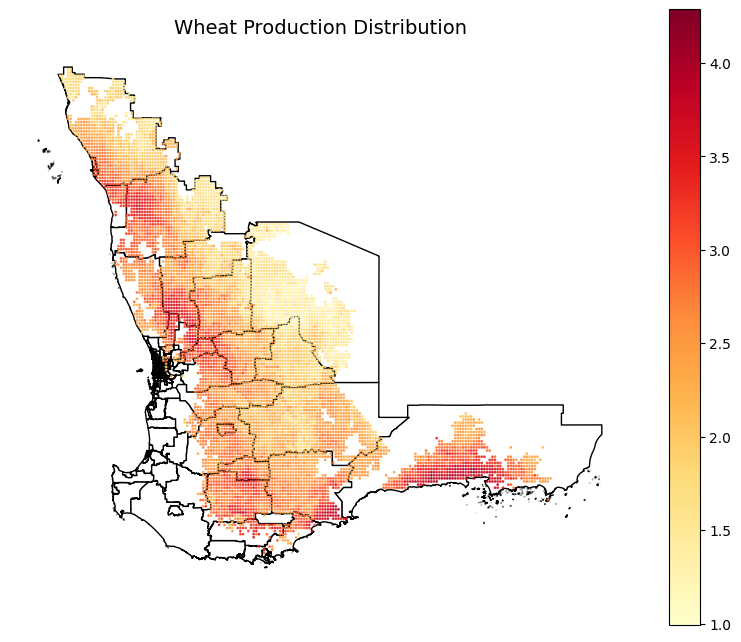

In [17]:
fig, ax = plt.subplots(figsize=(10, 8))

# Plot boundary
gdf_shape.plot(
    ax=ax,
    color="white",
    edgecolor="black",
    linewidth=1
)

# Plot wheat production points
gdf_points.plot(
    ax=ax,
    column="H_wheat_dot_hat",
    cmap="YlOrRd",
    markersize=1,
    legend=True,
    alpha=0.8
)

ax.set_title("Wheat Production Distribution", fontsize=14)
ax.set_axis_off()

plt.show()


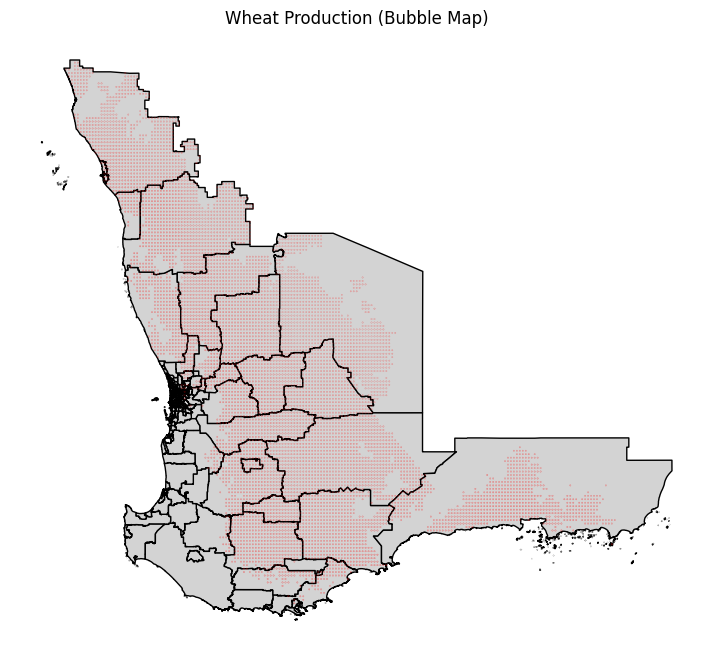

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))

gdf_shape.plot(ax=ax, color="lightgrey", edgecolor="black")

gdf_points.plot(
    ax=ax,
    markersize=gdf_points["H_wheat_dot_hat"] / 100,  # scale factor
    color="red",
    alpha=0.8
)

ax.set_title("Wheat Production (Bubble Map)")
ax.set_axis_off()

plt.show()


PLOT Farm data using .nc files

In [9]:
import xarray as xr
import matplotlib.pyplot as plt
import geopandas as gpd

# === Open NetCDF ===
ds = xr.open_dataset(r'Data\raster\rounded_climate\wheat_farm_1991.nc')
print(ds)

<xarray.Dataset> Size: 276kB
Dimensions:          (lat: 160, lon: 213)
Coordinates:
  * lat              (lat) float64 1kB -27.15 -27.2 -27.25 ... -35.05 -35.1
  * lon              (lon) float64 2kB 113.6 113.7 113.7 ... 124.1 124.2 124.2
Data variables:
    H_wheat_dot_hat  (lat, lon) float64 273kB ...
Attributes:
    fyear:    2022
    cyear:    1991
    pyear:    2022
    tyear:    2022


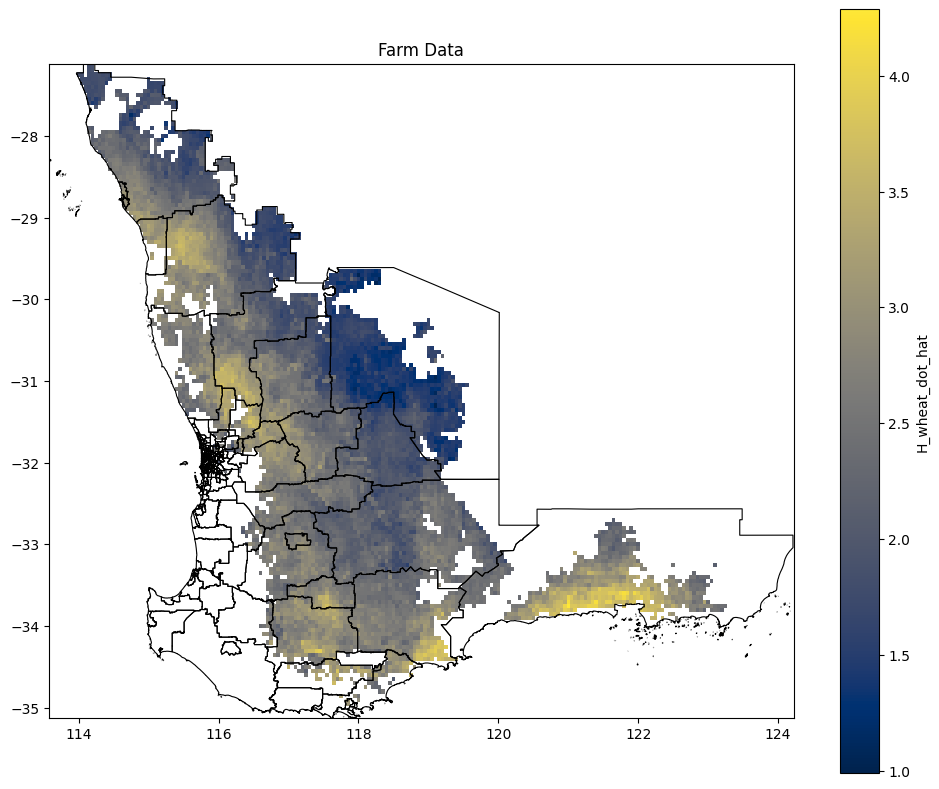

In [8]:
# === Load shapefile ===
shapefile_path = r'Eastern_Aus_Bunbury\Eastern_Aus_Bunbury.shp'
region_shape = gpd.read_file(shapefile_path).to_crs("EPSG:4326")

# Select farm variable (NO time dimension)
farm_data = ds['H_wheat_dot_hat']   # (lat, lon)

# === Create plot ===
fig, ax = plt.subplots(figsize=(10, 8))

farm_data.plot(
    ax=ax,
    cmap='cividis',
    add_colorbar=True
)

# Overlay shapefile boundary
region_shape.boundary.plot(
    ax=ax,
    color='black',
    linewidth=0.8
)

ax.set_title("Farm Data")
ax.set_xlabel("")
ax.set_ylabel("")

plt.tight_layout()
plt.show()
